**Oasis Data Science Internship**

**Aditya Rajesh Sakhadeo**

**Task 3 - Car Price Prediction**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("Data.csv")

**Getting Overview Of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Plotting the heatmap to understand relation between price and other features**

<ipython-input-4-e3505536d2b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


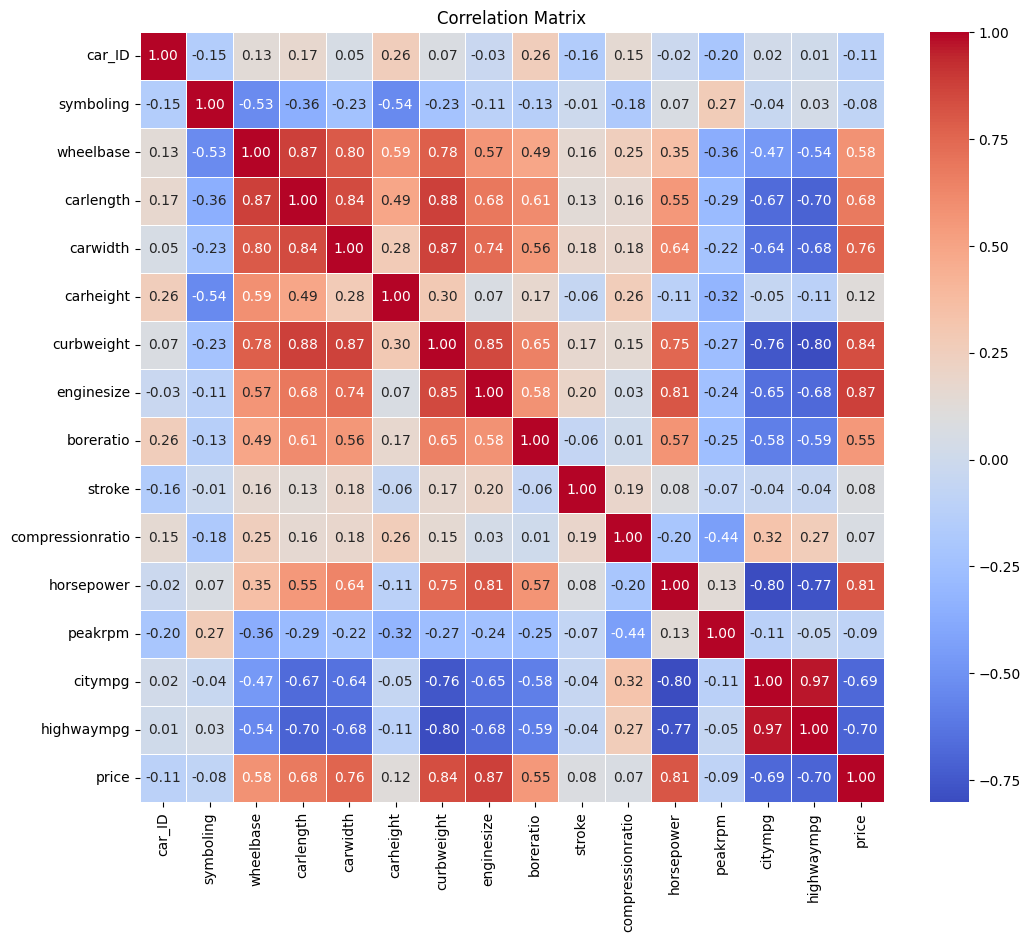

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Removing less co-related features**

In [ ]:
df.drop(df.columns[[0,1,2,5,8,12,19,20,22]],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   carbody         205 non-null    object 
 3   drivewheel      205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  fuelsystem      205 non-null    object 
 12  boreratio       205 non-null    float64
 13  horsepower      205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  highwaympg      205 non-null    int64  
 16  price           205 non-null    float64
dtypes: float64(5), int64(5), object(7)


**Plotting heatmap of mostly co-related features**

<ipython-input-7-e3505536d2b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


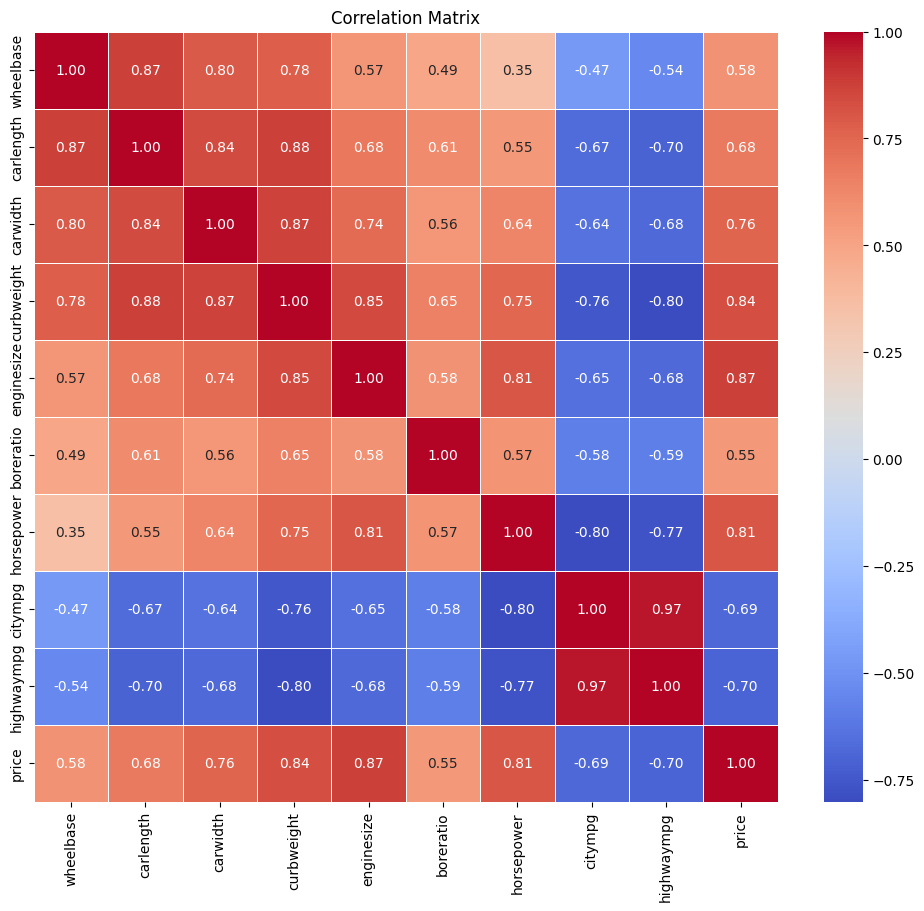

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**To deal with categorical value one-hot encoding is used**

In [ ]:
categorical_col = ["fueltype","aspiration","carbody","drivewheel","enginetype","cylindernumber","fuelsystem"]
one_hot_encoded = pd.get_dummies(df, columns=categorical_col, drop_first=True)

In [ ]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   curbweight             205 non-null    int64  
 4   enginesize             205 non-null    int64  
 5   boreratio              205 non-null    float64
 6   horsepower             205 non-null    int64  
 7   citympg                205 non-null    int64  
 8   highwaympg             205 non-null    int64  
 9   price                  205 non-null    float64
 10  fueltype_gas           205 non-null    uint8  
 11  aspiration_turbo       205 non-null    uint8  
 12  carbody_hardtop        205 non-null    uint8  
 13  carbody_hatchback      205 non-null    uint8  
 14  carbody_sedan          205 non-null    uint8  
 15  carbod

**Seperating features and label**

In [ ]:
features = one_hot_encoded.drop('price',axis=1)
label = one_hot_encoded['price']

In [ ]:
features.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
label.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

**Splitting data into training set and testing set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

164
41


**Declaring different regression models**

In [ ]:
linear = LinearRegression()

In [ ]:
decision = DecisionTreeRegressor()

In [ ]:
r_forest = RandomForestRegressor()

**Training models over training data**

In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
r_forest.fit(X_train,y_train)

RandomForestRegressor()

**Validating models over testing or validating set**

In [ ]:
linear_pred = linear.predict(X_test)

In [ ]:
decision_pred=decision.predict(X_test)

In [ ]:
r_forest_pred = r_forest.predict(X_test)

**Checking performance of models using performance measure such as mean squarred error(MSE) r squarred error (R2_score)**

In [ ]:
mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)

In [ ]:
mse_2 = mean_squared_error(y_test, decision_pred)
r2_2 = r2_score(y_test, decision_pred)

In [ ]:
mse_3 = mean_squared_error(y_test, r_forest_pred)
r2_3 = r2_score(y_test, r_forest_pred)

**Function that will write the performance of the models in text file**

In [ ]:
def write_scores(model,mse,r2):
  f=open("Car_price_scores.txt","a+")
  regressor=str(model)
  MSE=str(mse)
  R2=str(r2)
  f.write(regressor+"\n")
  f.write("MSE Score: "+MSE+"\n")
  f.write("R2 Score: "+R2+"\n")

In [ ]:
write_scores(linear,mse,r2)
write_scores(decision,mse_2,r2_2)
write_scores(r_forest,mse_3,r2_3)

# **Creating the test instance**

In [ ]:
test1 = X_train.iloc[78]
test2 = X_train.iloc[157]
test3 = X_train.iloc[42]

In [ ]:
test1_arr = np.asarray(test1)
test2_arr = np.asarray(test2)
test3_arr = np.asarray(test3)

In [ ]:
test_case_1 = list(test1_arr)
test_case_2 = list(test2_arr)
test_case_3 = list(test3_arr)

**Actual prices of the cars**

In [ ]:
actual_1=y_train.iloc[78]

In [ ]:
actual_2=y_train.iloc[157]

In [ ]:
actual_3=y_train.iloc[42]

In [ ]:
pred_test_case_1 = r_forest.predict([test_case_1])
pred_test_case_2 = r_forest.predict([test_case_2])
pred_test_case_3 = r_forest.predict([test_case_3])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Function to compare predicted and actual values**

In [ ]:
def compare_predicted_actual(predicted,actual):
  f=open("Compare_prediction.txt","a+")
  pred=str(predicted)
  act=str(actual)
  f.write("Predicted Score is: "+pred)
  f.write("Actual Score is: "+act+"\n")

In [ ]:
compare_predicted_actual(pred_test_case_1,actual_1)
compare_predicted_actual(pred_test_case_2,actual_2)
compare_predicted_actual(pred_test_case_3,actual_3)